In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
data1 = pd.read_csv('creditcard.csv')
data1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<AxesSubplot:xlabel='Time', ylabel='Amount'>

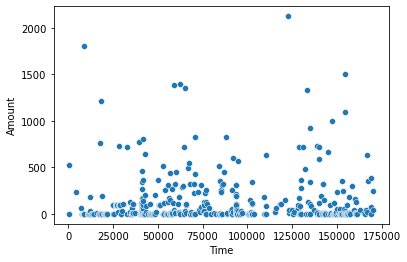

In [4]:
frauds = data1[data1['Class']==1]
sns.scatterplot(data=frauds,x='Time',y='Amount')

In [5]:
data1.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
data1['Class'].value_counts() 
#unbalanced

0    284315
1       492
Name: Class, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X= data1.drop('Class',axis=1)

In [9]:
y=data1['Class']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=48)

In [11]:

from sklearn.linear_model import LogisticRegression

In [12]:
logreg_model = LogisticRegression(class_weight='balanced', max_iter=12000, random_state=35)

In [13]:
logreg_model.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=12000, random_state=35)

In [14]:
prediction = logreg_model.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score

In [16]:
print(classification_report(y_test,prediction))
print("Confusion matrix: Logistic Regression") 
print(confusion_matrix(y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     99496
           1       0.05      0.93      0.09       187

    accuracy                           0.96     99683
   macro avg       0.52      0.94      0.53     99683
weighted avg       1.00      0.96      0.98     99683

Confusion matrix: Logistic Regression
[[95929  3567]
 [   14   173]]


In [17]:
print(accuracy_score(prediction,y_test))

0.9640761213045353


In [18]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(class_weight='balanced' ,random_state=35)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=35)

In [19]:
predictions = dtree.predict(X_test)
print("Decision Tree Classifier")
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

Decision Tree Classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     99496
           1       0.77      0.77      0.77       187

    accuracy                           1.00     99683
   macro avg       0.88      0.88      0.88     99683
weighted avg       1.00      1.00      1.00     99683

[[99453    43]
 [   43   144]]


In [20]:
print(accuracy_score(predictions,y_test))

0.9991372651304635


In [21]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(class_weight='balanced', random_state=35,n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=35)

In [22]:
rfc_pred = rfc.predict(X_test)
print('Random Forest Classifer')
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

Random Forest Classifer
[[99489     7]
 [   43   144]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     99496
           1       0.95      0.77      0.85       187

    accuracy                           1.00     99683
   macro avg       0.98      0.88      0.93     99683
weighted avg       1.00      1.00      1.00     99683



In [23]:
print(accuracy_score(predictions,y_test))

0.9991372651304635


In [31]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print("support Vector Machines")
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))


support Vector Machines
[[99496     0]
 [  187     0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     99496
           1       0.00      0.00      0.00       187

    accuracy                           1.00     99683
   macro avg       0.50      0.50      0.50     99683
weighted avg       1.00      1.00      1.00     99683



D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
print(accuracy_score(predictions,y_test))

0.9981240532487987
